In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class IdealGas:

    def __init__(self, nparticles, mass, radius, xlim, ylim, t):
        
        self.nparticles = nparticles #number of particles 
        self.mass = mass #mass of particles 
        self.radius = radius #radius of particles 
        self.xlim = xlim
        self.ylim = ylim 
        self.A = (xlim[1]- xlim[0])*(ylim[1]-ylim[0])
        self.t = t #array of times for the animation
        self.dt = t[1]-t[0]

        self.r = np.stack((np.random.uniform(*xlim, nparticles), 
                           np.random.uniform(*ylim, nparticles))).reshape((nparticles,2))
        

        self.v = np.stack((np.random.uniform(-100,100, nparticles), 
                           np.random.uniform(-100,100, nparticles))).reshape((nparticles,2))
        
        
    def dij(self):

        dist_matrix = np.zeros((self.nparticles, self.nparticles))

        for i in range(self.nparticles):
            for j in range(i, self.nparticles):

                dist_matrix[i,j] = np.linalg.norm(self.r[i]-self.r[j])

        return dist_matrix
    

    def check_collisions(self):

        """Checks if there has been a collision between 2 particles. If so, 
        updates the velocities taking into account conservation of energy
        and momentum."""

        

        dist_pairs = self.dij()
        
        rows, cols = np.triu_indices(dist_pairs.shape[0],k=1)
        indices = np.column_stack((rows,cols))
        i,j = indices[dist_pairs[rows,cols] <= 2*self.radius].T

        return i,j
        



    def step(self): 
        """1) check wall collisions and update the velocities for the particles in question
        2) check particle collisions and update the velocities. 
        3) step the positions"""

        #check for collisions between particles or walls,
        #updates the velocity vectors
        self.check_collisions()
        
        #step the positions
        self.r += self.v*self.dt






    
        




In [3]:
nparticles = 200
mass = 1
radius = 0.05 
xlim = [0,1]
ylim = [0,1]
t = np.linspace(0,10,200)
gas = IdealGas( nparticles, mass, radius, xlim, ylim, t)

(array([ 7., 10., 19., 15., 30., 36., 28., 33., 14.,  8.]),
 array([  4.59751672,  18.11418876,  31.63086081,  45.14753285,
         58.6642049 ,  72.18087694,  85.69754899,  99.21422103,
        112.73089308, 126.24756512, 139.76423717]),
 <BarContainer object of 10 artists>)

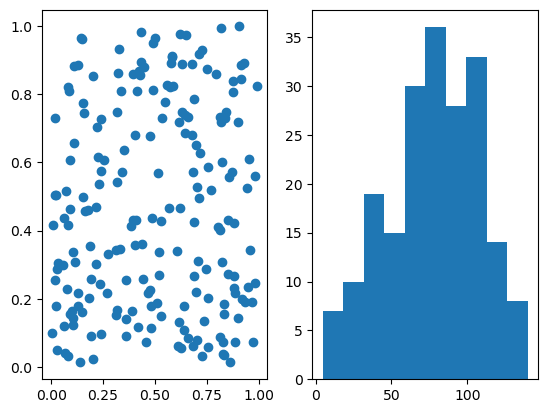

In [4]:
plt.subplot(1,2,1)
plt.scatter(gas.r[:,0], gas.r[:,1])

plt.subplot(1,2,2)
plt.hist(np.linalg.norm(gas.v,axis=1))

In [8]:
i,j = gas.check_collisions()
vi,vj  = gas.v[i], gas.v[j]
ri,rj = gas.r[i], gas.r[j]

vi = vi - ((ri-rj).dot(vi-vj))/((ri-rj).dot(ri-rj))*(ri-rj)

ValueError: shapes (565,2) and (565,2) not aligned: 2 (dim 1) != 565 (dim 0)

(array([[ 45.18461591, -59.00496053],
        [ 45.18461591, -59.00496053],
        [ 45.18461591, -59.00496053],
        ...,
        [-25.47823213, -91.61344634],
        [ 80.48783803,  26.47897563],
        [-46.69941733,  72.62191004]]),
 array([[-13.45975389, -43.20402276],
        [-97.2959453 ,  82.12192251],
        [-12.60453548, -37.48396133],
        ...,
        [ 42.90142523, -53.87437907],
        [ 39.13878064,  18.91691304],
        [ 51.25449443, -59.56321616]]))

# 2D Elastic collision

$$ \bold v_i' = \bold v_i - \frac{(\bold v_i - \bold v_j) \cdot (\bold r_i - \bold r_j)}{(\bold r_i - \bold r_j) \cdot (\bold r_i - \bold r_j)} (\bold r_i - \bold r_j) $$
$$ \bold v_j' = \bold v_j - \frac{(\bold v_j - \bold v_i) \cdot (\bold r_j - \bold r_i)}{(\bold r_j - \bold r_i) \cdot (\bold r_i - \bold r_j)} (\bold r_j - \bold r_i) $$ 
